## **<span style="color:cyan">จัดกลุ่มตามพฤติกรรมการใช้สื่อเพื่อการติดตามข่าวของคนในแต่ละช่วงวัย<span>**
* ข้อมูลแบบสำรวจพฤติกรรมการใช้สื่อเพื่อการติดตามข่าวของคนแต่ละช่วงวัย รอบแรกปี 2562 : [Comsumer Insight link](https://data.go.th/dataset/consumer_insight)
* แบบสอบถามที่ใช้ในการสำรวจพฤติกรรมการใช้สื่อเพื่อการติดตามข่าวของคนแต่ละช่วงวัย : [Github survey link](https://github.com/LemmonLime/final_ml/raw/main/survey.docx)

### **<span style="color:orange">รายชื่อสมาชิกในกลุ่ม <span>**
* 6142781126 ต้นสาย ณ สงขลา
* 6142797226 ธนวัชร แสงคีรีพัฒน์
* 6142812026 นวัช สุภาสอน


---

# **<span style="color:orange">Exploratory Data Analysis (EDA)<span>**
ปัจจุบันโลกได้มีการเปลี่ยนแปลงและพัฒนาทางเทคโนโลยีเป็นอย่างมาก วิถีชิวิตและพฤติกรรมของผู้คนก็ได้เปลี่ยนแปลงไปจากอดีตเช่นกัน รวมไปถึงพฤติกรรมการติดตามข่าวสาร โดยกลุ่มของเราเชื่อว่าคนในสังคมแต่ละช่วงวัยมีพฤติกรรมการติดตามข่าวสารที่ต่างกันไม่ว่าจะเป็น ช่วงเวลาที่ใช้ในการติดตามข่าวสาร, ระยะเวลาที่ใช้งาน, สื่อที่ใช้ในการติดตาม, ประเภทของเนื้อหาข่าวที่ติดตาม เป็นต้น

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import ipywidgets as widgets
from ipywidgets import interact
from numpy import nan
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# plt.rcParams['font.family']='Tahoma'

from sklearn.linear_model import LogisticRegression

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from urllib.request import urlopen
from PIL import Image

### **<span style="color:orange">ตารางข้อมูลดิบจากแบบสำรวจพฤติกรรมการใช้สื่อเพื่อการติดตามข่าว<span>**

In [59]:
#read file
url = 'https://github.com/LemmonLime/final_ml/raw/main/dataset_consumer-insight-survey2019.xlsx'
df = pd.read_excel(url)
pd.set_option('display.max_columns', None)
df

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,a53,a54,a57,a58,a6,a7,a81,a82,a91,a92,j1,j2,j3,j4,j5,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,l1,p1,p2,p3,p4,p5,p501,p6,q1,q2,q3,q4,q5,q901,q902,r1,r2,r3,r4,r5,rr1,s1,s2,s3,s4,s5,ss1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,v1,v101,v102,w1,x1,x2,x3,x4,x5,filter_$,a2age,a302New,a6New,a5New,a81New,a82New,J1new,J2new,J3new,J4new,J5new,JOrder,q1new,q2new,q3new,q4new,q5new,q6new,q7new,q8new,q9new,q10new,q1001new,r1new,s1new,t1new,u1new,r2new,s2new,t2new,u2new,r3new,s3new,t3new,u3new,r4new,s4new,t4new,u4new,r5new,s5new,t5new,u5new,r6new,s6new,t6new,u6new,r7new,s7new,t7new,u7new,r8new,s8new,t8new,u8new,r9new,s9new,t9new,u9new,r10new,s10new,t10new,u10new,r11new,s11new,t11new,u11new,r12new,s12new,t12new,u12new,r13new,s13new,t13new,u13new,r14new,s14new,t14new,u14new,r15new,s15new,t15new,u15new,r16new,s16new,t16new,u16new,r17new,s17new,t17new,u17new,r18new,s18new,t18new,u18new,r19new,s19new,t19new,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,NaN,NaN,1.0,NaN,9.0,NaN,1,2,5,2.0,3,4,5,9,9,0,1,0,0,0,1,0,0,0,0,6,1,1,1,0,0,0,0,1,3,4,99,99,99,99,3,15,10,8,4,99,99,99,99,99,99,99,3.0,5.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,8.0,10.0,15.0,2,99.0,99,3,1,1,0,0,0,1.0,2,2.0,1.0,5.0,1.0,2.0,0,0,1,2,3,,1,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,1,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,6.0,NaN,NaN,NaN,2.0,NaN,3,2,5,2.0,3,4,5,9,9,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,6,99,99,99,99,2,3,4,8,10,99,99,99,99,99,99,99,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1,2.0,99,3,1,1,1,1,0,1.0,2,2.0,2.0,2.0,3.0,2.0,0,0,1,2,3,,1,0,2,3,0,0,0,0,0,0,0,4,0,1,1,0,0,0,0,3,0,1,1,5,0,1,1,2,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,1,2,5,2.0,3,4,5,9,9,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,4,99,99,99,99,7,5,3,1,4,99,99,99,99,99,99,99,1.0,3.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,2,99.0,99,3,1,1,0,0,0,1.0,2,2.0,2.0,2.0,1.0,2.0,0,0,1,2,3,,1,0,2,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0,1,1,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,1,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,NaN,NaN,NaN,NaN,2.0,NaN,1,2,5,2.0,1,3,4,5,9,0,1,0,0,1,1,0,0,0,0,5,1,1,1,0,0,0,0,1,3,4,99,99,99,99,1,3,2,4,15,99,99,99,99,99,99,99,1.0,2.0,3.0,4.0,15.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,4.0,15.0,NaN,NaN,NaN,NaN,NaN,2,99.0,99,3,1,1,1,1,0,1.0,3,1.0,2.0,1.0,1.0,2.0,1,0,2,3,4,,1,0,2,0,3,0,0,0,0,0,0,1,0,1,1,3,0,1,1,2,0,1,1,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,4,2,5,2.0,1,3,5,9,9,0,1,0,1,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,99,99,99,99,99,1,3,2,4,15,99,99,99,99,99,99,99,1.0,2.0,3.0,4.0,15.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,4.0,15.0,NaN,NaN,NaN,NaN,NaN,2,99.0,99,3,1,0,0,0,0,1.0,4,1.0,1.0,4.0,3.0,2.0,2,0,1,0,3,,1,0,2,0,0,0,0,0,0,0,0,1,0,1,1,3,0,1,1,2,0,1,1,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### **<span style="color:orange">สารบัญรายละเอียดข้อมูล<span>**

In [60]:
dictf = pd.read_excel('https://github.com/LemmonLime/final_ml/raw/main/data_dictionary_consumer-insight-survey2019.xlsx')
dictf

@interact
def filter(regex_pat="."):
    return dictf[(dictf["รหัส"].str.contains(regex_pat, regex=True, case=False))]

interactive(children=(Text(value='.', description='regex_pat'), Output()), _dom_classes=('widget-interact',))

In [61]:
#clean Data
df['เพศ'] = df['a1'].replace(1,"ชาย").replace(2,"หญิง")
df['สถานะทางการศึกษา'] = df['a301'].replace(1,"กำลังศึกษาอยู่").replace(2,"จบการศึกษาแล้ว")
df['ระดับการศึกษา'] = df['a302'].replace(1,"ประถมศึกษา").replace(2,"มัธยมศึกษาตอนต้น").replace(3,"มัธยมศึกษาตอนปลาย").replace(4,"ปวช.").replace(5,"ปวส./ปวท./อนุปริญญา").replace(6,"ปริญญาตรี").replace(7,"สูงกว่าปริญญาตรี").replace(8,"อื่น ๆ").replace(9,"ไม่ได้ศึกษาในระบบใดเลย")
df['จบปริญญาตรีและทำงานได้ไม่เกิน 4 ปีหรือไม่'] = df['a4'].replace(1,"ใช่").replace(2,"ไม่ใช่")
df['อาชีพ'] = df['a5'].replace(1,"รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังกัด").replace(2,"พนักงานเอกชน/ลูกจ้างบริษัท").replace(3,"เจ้าของธุรกิจ").replace(4,"อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง").replace(5,"นักเรียน/นักศึกษา").replace(6,"เกษียณอายุ/แม่บ้านพ่อบ้าน").replace(7,"เกษตรกร เช่น ทำไร่ ประมง ฯลฯ").replace(8,"อื่นๆ").replace(9,"อื่นๆ")
df['รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังกัด'] = df['a51'].replace(1,"การไฟฟ้าภูมิภาค").replace(2,"สำนักงานเขต").replace(3,"TOT").replace(4,"ระทรวงสาธารณสุข").replace(5,"กระทรวงมหาดไทย").replace(6,"การประปา").replace(7,"กระทรวงศึกษาธิการ").replace(8,"โรงพยาบาล").replace(9,"ครู").replace(10,"กรมสรรพกร").replace(11,"ตำรวจ").replace(12,"กระทรวงสาธารณสุข")
df['พนักงานเอกชน/ลูกจ้างบริษัท'] = df['a52'].replace(1,"ผู้จัดการ").replace(2,"ธรุการ").replace(3,"รปภ").replace(4,"แม่บ้าน(ทำความสะอาด)").replace(5,"จัดซื้อ").replace(6,"การตลาด").replace(7,"บัญชี").replace(8,"บุคคล").replace(9,"เร่งรัดหนี้สิน").replace(10,"กระเป๋ารถเมลล์").replace(11,"กฎหมาย").replace(12,"รับ-ส่งเอกสาร/แมสเซนเจอร์").replace(13,"ฝ่ายผลิต").replace(14,"IT").replace(15,"คลังสินค้า").replace(16,"การบริการ")
df['เจ้าของธุรกิจ'] = df['a53'].replace(1,"รับทำบัญชี").replace(2,"ขายอาหารตามสั่ง/ก๋วยเตี๋ยว").replace(3,"ขายเสื้อผ้า").replace(4,"ขายรองเท้า").replace(5,"รับเหมาก่อสร้าง/ขายอุปกรณ์ ก่อสร้าง").replace(6,"ร้านเสริมสวย").replace(7,"ขายผลไม้/ขายผัก").replace(8,"ขายของชำ").replace(9,"รับทำกุญแจ").replace(10,"สินค้าเกษตร").replace(11,"ขายอาหารสด").replace(12,"ทำป้ายโฆษณา").replace(13,"ร้านเกมส์").replace(14,"ขายต้นไม้/ดอกไม้").replace(15,"ร้านซ่อมรถ").replace(16,"ขายเครื่องสำอางค์")
df['อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง'] = df['a54'].replace(1,"บริการร้านกาแฟ/ขายกาแฟ").replace(2,"รับจ้างทั่วไป").replace(3,"ช่างตัดผม").replace(4,"กฎหมาย").replace(5,"ซักอบรีด").replace(6,"ขับรตตู้/ขับวิน").replace(7,"เลี่ยมพระ").replace(8,"ช่างทำรองเท้า").replace(9,"ก่อสร้าง").replace(10,"บริการ").replace(11,"อื่นๆ").replace(14,"อื่นๆ").replace(15,"บริการ").replace(16,"บริการ")
df['เกษตรกร เช่น ทำไร่ ประมง ฯลฯ'] = df['a57'].replace(1,"ทำนา").replace(2,"เลี้ยงสัตว์")
df['รายได้เฉลี่ย'] = df['a6'].replace(1,"ไม่เกิน 15,000 บาท").replace(2,"15,001 - 30,000 บาท").replace(3,"30,001 – 50,000 บาท").replace(4,"50,001 – 80,000 บาท").replace(5,"80,001 บาทขึ้นไป")
df['สถานะภาพส่วนตัว'] = df['a81'].replace(1,"โสด (ไม่มีแฟน ไม่มีลูก)").replace(2,"มีแฟน/คนรัก").replace(3,"สามีหรือภรรยา แต่ยังไม่มีลูก").replace(4,"มีสามีหรือภรรยา และมีลูกแล้ว").replace(5,"ม่าย/หย่าร้าง  แต่ยังไม่มีลูก").replace(6,"ม่าย/หย่าร้าง และมีลูกแล้ว").replace(9,nan)
df['ลักษณะการอยู่อาศัย'] = df['a82'].replace(1,"อยู่คนเดียว").replace(2,"อยู่กับครอบครัว").replace(3,"อยู่กับเพื่อน").replace(4,"อยู่กับแฟน/คนรัก (โดยที่ยังไม่แต่งงาน)").replace(9,nan)
df['ภูมิภาค'] = df['a91'].replace(1,"กรุงเทพฯและปริมณฑล").replace(2,"ภาคเหนือ").replace(3,"ภาคตะวันออกเฉียงเหนือ").replace(4,"ภาคกลาง").replace(5,"ภาคใต้")
df['เขตพื้นที่'] = df['a92'].replace(1,"ในเขตเทศบาล").replace(2,"นอกเขตเทศบาล")
df['Gen_name'] = df['Gen_group'].replace(1,"Gen Z").replace(2,"Gen Y").replace(3,"Gen X").replace(4,"Gen B")


#### **<span style="color:orange">ข้อมูลทั่วไปจากผู้ตอบแบบสอบถามจำนวนทั้งหมด 2059 คน<span>**

In [62]:
indicator_list = [
    'เพศ','สถานะทางการศึกษา','ระดับการศึกษา','จบปริญญาตรีและทำงานได้ไม่เกิน 4 ปีหรือไม่','อาชีพ'
]

plt.rcParams['font.family']='Tahoma'
@interact(ข้อมูล=indicator_list)
def plot_chart(ข้อมูล):
    x = ข้อมูล
    df[x].value_counts().plot(kind='pie',autopct='%1.0f%%', title = "ข้อมูลจากผู้ตอบแบบสอบถามจำนวนทั้งหมด 2059 คน")


interactive(children=(Dropdown(description='ข้อมูล', options=('เพศ', 'สถานะทางการศึกษา', 'ระดับการศึกษา', 'จบป…

* ข้อมูลเชิงลึกตามอาชีพ


In [63]:
indicator_list = [
    'รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังกัด', 'พนักงานเอกชน/ลูกจ้างบริษัท','เจ้าของธุรกิจ','อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง','เกษตรกร เช่น ทำไร่ ประมง ฯลฯ']

plt.rcParams['font.family']='Tahoma'
@interact(ข้อมูลอาชีพ=indicator_list)
def plot_chart(ข้อมูลอาชีพ):
    x = ข้อมูลอาชีพ
    df[x].value_counts().plot(kind='barh')

interactive(children=(Dropdown(description='ข้อมูลอาชีพ', options=('รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สัง…

* สถานภาพส่วนตัว

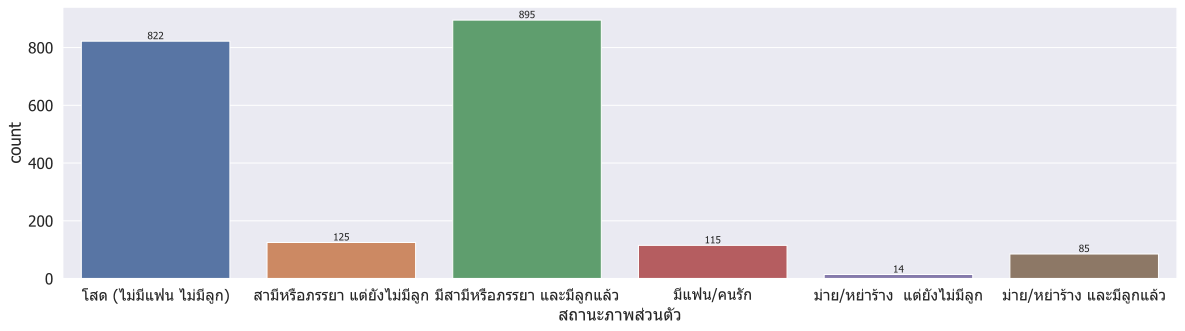

In [64]:
plt.figure(figsize=(20,5))
plt.rcParams['font.family']='Tahoma'
ax=sns.countplot(x='สถานะภาพส่วนตัว',data=df)
ax.bar_label(ax.containers[0])
plt.show()

* เขตพื้นที่อยู่อาศัย

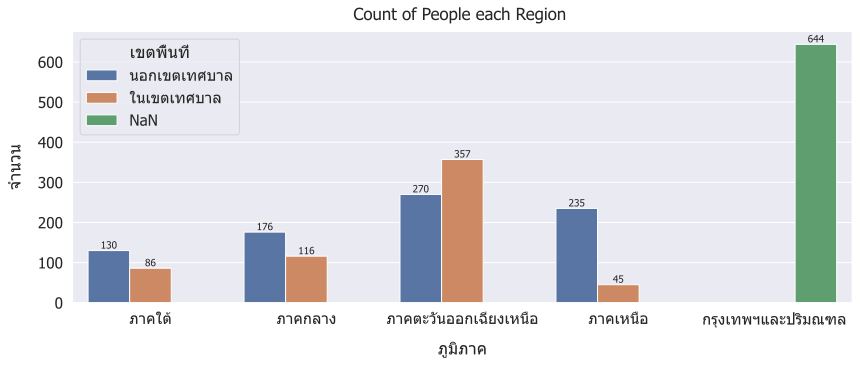

In [65]:
df['เขตพื้นที่'].fillna("NaN", inplace = True)
plt.figure(figsize=(14,5))
plt.rcParams['font.family']='Tahoma'
ax1 = sns.countplot(x='ภูมิภาค',hue = 'เขตพื้นที่', data=df)

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])

plt.xlabel("ภูมิภาค", labelpad=14)
plt.ylabel("จำนวน", labelpad=14)
plt.title("Count of People each Region ", y=1.02);
plt.show()

---

### **<span style="color:orange">กลุ่มอายุแบ่งช่วงตามวัย<span>**
การแบ่งกลุ่มประชากรตามแนวคิดนักเศรษฐศาสตร์ โดยแต่ละกลุ่ม ในแนวคิดทางเศรษฐศาสตร์ว่าด้วยเรื่องผู้ซื้อผู้ขาย มีพฤติกรรมการแตกต่างกัน การทำความเข้าใจแต่ละกลุ่มจะทำให้สามารถลดช่องว่างในการสื่อสาร
* Gen B (Baby Boomer) อายุ 53 - 72 ปี
* Gen X อายุ 38 - 52 ปี
* Gen Y อายุ 20 - 37 ปี
* Gen Z อายุ 13 - 19 ปี

credit: [Gen Y/Gen Me กลุ่มผู้กุมชะตาโลก](https://www.dmh.go.th/news/view.asp?id=1251)

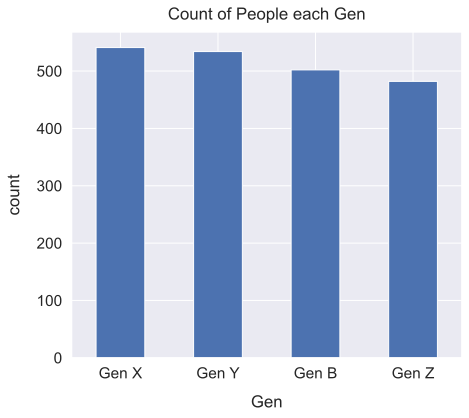

In [66]:
sns.set(font_scale=1.4)
df['Gen_name'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.rcParams['font.family']='Tahoma'
plt.xlabel("Gen", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Count of People each Gen", y=1.02);

---
### **<span style="color:orange">แบบสอบถามช่วงเวลาการติดตามข่าว<span>**

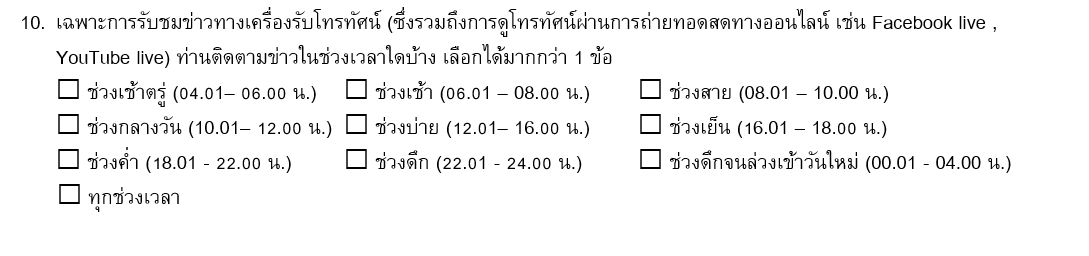

In [67]:
img10 = Image.open(urlopen('https://github.com/LemmonLime/final_ml/raw/main/10.png'))
img10

* คอลัมน์แสดงคำตอบช่วงเวลาที่ใช้ในการติดตามข่าว

In [68]:
dictf[19:29]

,รหัส,ข้อคำถาม,code ตัวเลข
19,k1,k1ติดตามข่าวในช่วงเช้าตรู่,0=ไม่ใช่ 1=ใช่
20,k2,k2ติดตามข่าวในช่วงเช้า,0=ไม่ใช่ 1=ใช่
21,k3,k3ติดตามข่าวในช่วงสาย,0=ไม่ใช่ 1=ใช่
22,k4,k4ติดตามข่าวในช่วงกลางวัน,0=ไม่ใช่ 1=ใช่
23,k5,k5ติดตามข่าวในช่วงบ่าย,0=ไม่ใช่ 1=ใช่
24,k6,k6ติดตามข่าวในช่วงเย็น,0=ไม่ใช่ 1=ใช่
25,k7,k7ติดตามข่าวในช่วงค่ำ,0=ไม่ใช่ 1=ใช่
26,k8,k8ติดตามข่าวในช่วงดึก,0=ไม่ใช่ 1=ใช่
27,k9,k9ติดตามข่าวในช่วงดึกจนล่วงเข้าวันใหม่,0=ไม่ใช่ 1=ใช่
28,k10,k10ติดตามข่าวในทุกช่วงเวลา,0=ไม่ใช่ 1=ใช่


In [69]:
df.filter(regex='^k')

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0,0,1,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0
4,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2054,0,0,1,0,0,0,1,0,0,0
2055,0,1,1,1,1,0,0,1,0,0
2056,0,0,0,0,0,1,1,0,0,0
2057,0,0,1,0,0,1,1,1,0,0


* ### **<span style="color:orange">Logistic regression : จัดกลุ่มแต่ละช่วงวัยโดยใช้ช่วงเวลาที่ติดตามข่าว<span>**

In [70]:
df['Gen_group']

0       2
1       2
2       2
3       3
4       4
       ..
2054    3
2055    4
2056    3
2057    3
2058    3
Name: Gen_group, Length: 2059, dtype: int64

In [71]:
# แบ่งข้อมูลเป็น train data และ test data
X = df[df.columns[df.columns.str.startswith('k')]]
y = df['Gen_group']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=7, stratify=y)

In [72]:
X_train

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
1427,0,0,0,0,0,0,1,0,0,0
1076,0,1,0,0,0,0,0,1,0,0
668,0,0,0,0,0,0,1,0,0,0
1413,0,1,0,0,0,0,1,1,0,0
1231,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1020,0,0,0,0,0,0,1,0,0,0
567,0,1,0,0,0,0,0,0,0,0
628,0,0,0,0,1,0,0,0,0,0
1023,0,0,0,0,0,0,0,1,0,0


In [73]:
y_train

1427    4
1076    3
668     2
1413    3
1231    1
       ..
1020    1
567     3
628     3
1023    1
850     4
Name: Gen_group, Length: 1647, dtype: int64

ทำการ Fit model และแสดงค่า model score เพื่อดูค่าความแม่นยำของ model

In [74]:
model=LogisticRegression()
model.fit(X_train, y_train)
print(f'train score={model.score(X_train, y_train):.4f}\ntest  score={model.score(X_test, y_test):.4f}')

train score=0.3200
test  score=0.3374


ทำนายผล

In [75]:
predicted = model.predict(X_test)

แสดงผลการทำนาย

In [76]:
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[43, 24, 23,  6],
       [31, 37, 31,  8],
       [22, 31, 43, 12],
       [21, 27, 37, 16]], dtype=int64)

แสดงผลการทำนายที่คลาดเคลื่อน

In [77]:
y_test

788     1
681     4
1233    2
776     2
1911    2
       ..
1443    2
807     4
1104    2
445     3
508     3
Name: Gen_group, Length: 412, dtype: int64

In [78]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
788,1,3
681,4,1
1233,2,1
1911,2,3
1161,4,2
...,...,...
188,2,1
1443,2,4
807,4,1
445,3,4


---
#### **<span style="color:orange">ระยะเวลาเฉลี่ยที่ใช้ในการติดตามข่าวสารต่อวัน<span>**

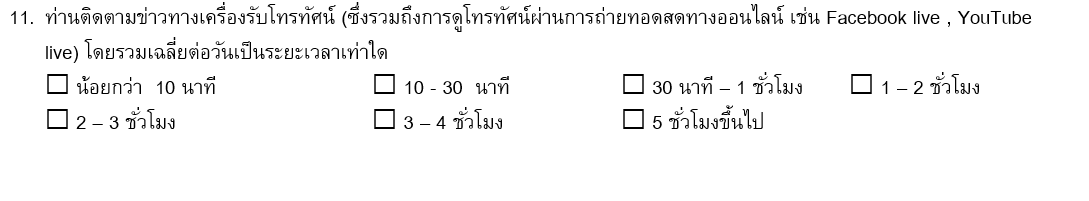

In [79]:
img11 = Image.open(urlopen('https://github.com/LemmonLime/final_ml/raw/main/11.png'))
img11

* คอลัมน์แสดงคำตอบระยะเวลาเฉลี่ยที่ใช้ในการติดตามข่าวสารต่อวัน

In [80]:
pd.set_option('display.max_colwidth', None)
dictf[29:30]

,รหัส,ข้อคำถาม,code ตัวเลข
29,l1,l11ท่านติดตามข่าวทางเครื่องรับโทรทัศน์ โดยรวมเฉลี่ยต่อวันเป็นระยะเวลาเท่าใด,1=น้อยกว่า 10 นาที 2=10 - 30 นาที 3=30 นาที – 1 ชั่วโมง 4=1 – 2 ชั่วโมง 5=2 – 3 ชั่วโมง 6=3 – 4 ชั่วโมง 7=5 ชั่วโมงขึ้นไป


In [81]:
df[['l1']]

,l1
0,6
1,6
2,6
3,5
4,6
...,...
2054,4
2055,6
2056,5
2057,6


* #### **<span style="color:orange">KNeighborsClassifier: จัดกลุ่มแต่ละช่วงวัยตามระยะเวลาเฉลี่ยที่ใช้ในการติดตามข่าวสารต่อวัน<span>**

In [82]:
df['Gen_name']

0       Gen Y
1       Gen Y
2       Gen Y
3       Gen X
4       Gen B
        ...  
2054    Gen X
2055    Gen B
2056    Gen X
2057    Gen X
2058    Gen X
Name: Gen_name, Length: 2059, dtype: object

แบ่งข้อมูลเป็น train data และ test data

In [83]:
test_size=0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df[['l1']], 
    df['Gen_name'], 
    test_size=test_size, random_state=7)

ทำการ Fit model และแสดงค่า model score เพื่อดูค่าความแม่นยำของ model

In [84]:
model1 = KNeighborsClassifier()
model1.fit(X_train1, y_train1)
print(f'train score={model1.score(X_train1, y_train1):.4f}\ntest  score={model1.score(X_test1, y_test1):.4f}')

train score=0.2999
test  score=0.2500


แสดงผลการทำนาย

In [85]:
predicted1 = model1.predict(X_test1)
cm1=metrics.confusion_matrix(y_test1, predicted1)
cm1


array([[43, 23, 33,  3],
       [58, 21, 42,  0],
       [39, 23, 28,  3],
       [31, 25, 29, 11]], dtype=int64)

แสดงผลการทำนายที่คลาดเคลื่อน

In [86]:
dx1=pd.DataFrame({'y_true': y_test1, 'y_pred': predicted1})
dx1[dx1.y_true != dx1.y_pred]

,y_true,y_pred
1331,Gen Y,Gen B
127,Gen B,Gen Y
300,Gen X,Gen Y
1932,Gen Y,Gen B
1889,Gen B,Gen Z
...,...,...
643,Gen Y,Gen X
359,Gen Z,Gen B
540,Gen Z,Gen Y
1906,Gen Y,Gen X


---
### **<span style="color:orange">สื่อออนไลน์ที่ใช้งานเพื่อติดตามข่าว<span>**

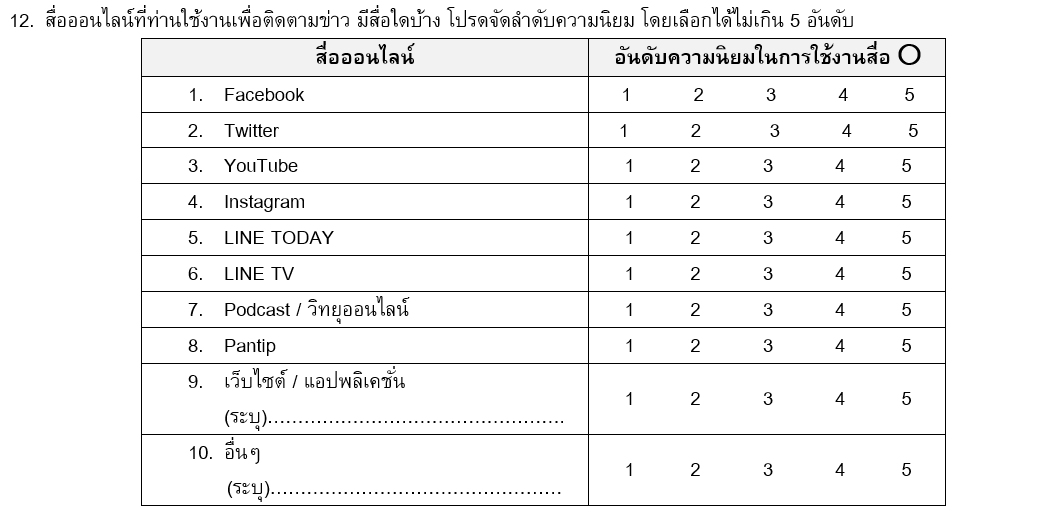

In [87]:
img12 = Image.open(urlopen('https://github.com/LemmonLime/final_ml/raw/main/12.png'))
img12

* คอลัมน์แสดงคำตอบสื่อออนไลน์ที่ใช้ในการติดตามข่าว

In [88]:
dictf[97:107]

,รหัส,ข้อคำถาม,code ตัวเลข
97,q1new,q1new 1. Facebook,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
98,q2new,q2new 2.Twitter,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
99,q3new,q3new 3. YouTube,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
100,q4new,q4new 4.Instagram,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
101,q5new,q5new 5.Line Today,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
102,q6new,q6new 6. Line TV,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
103,q7new,q7new 7. Postcast/วิทยุออนไลน์,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
104,q8new,q8new 8.Pantip,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
105,q9new,q9new เว็บไซด์/แอปพลิเคชั่นอื่นๆ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
106,q10new,q10new อื่นๆระบุ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5


In [89]:
df[['q1new','q2new','q3new','q4new','q5new','q6new','q7new','q8new','q9new','q10new']]

,q1new,q2new,q3new,q4new,q5new,q6new,q7new,q8new,q9new,q10new
0,1,0,3,2,0,0,0,0,0,0
1,1,0,2,3,0,0,0,0,0,0
2,1,0,2,0,0,3,0,0,0,0
3,1,0,2,0,3,0,0,0,0,0
4,1,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2054,1,0,2,0,0,3,0,0,0,0
2055,1,3,2,0,0,0,0,0,0,0
2056,1,0,2,0,0,0,0,0,0,0
2057,1,2,3,0,0,0,0,0,0,0


* #### **<span style="color:orange">KNeighborsClassifier: จัดกลุ่มแต่ละช่วงวัยตามสื่อออนไลน์ที่ใช้เพื่อติดตามข่าว<span>**

แบ่งข้อมูลเป็น train data และ test data

In [90]:
test_size=0.2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df[['q1new','q2new','q3new','q4new','q5new','q6new','q7new','q8new','q9new','q10new']], 
    df['Gen_group'], 
    test_size=test_size, random_state=7)

ทำการ Fit model และแสดงค่า model score เพื่อดูค่าความแม่นยำของ model

In [91]:
model2 = KNeighborsClassifier()
model2.fit(X_train2, y_train2)
print(f'train score={model2.score(X_train2, y_train2):.4f}\ntest  score={model2.score(X_test2, y_test2):.4f}')

train score=0.3631
test  score=0.2694


แสดงผลการทำนาย

In [92]:
predicted2 = model2.predict(X_test2)
cm2=metrics.confusion_matrix(y_test2, predicted2)
cm2

array([[24, 52, 14,  6],
       [14, 54, 23,  2],
       [21, 68, 26,  6],
       [21, 53, 21,  7]], dtype=int64)

แสดงผลการทำนายที่คลาดเคลื่อน

In [93]:
dx2=pd.DataFrame({'y_true': y_test2, 'y_pred': predicted2})
dx2[dx2.y_true != dx2.y_pred]

,y_true,y_pred
1809,4,1
127,4,2
300,3,2
1889,4,2
971,3,2
...,...,...
359,1,3
540,1,3
1906,2,3
224,2,1


---

### **<span style="color:orange">เนื้อหาข่าวที่ผู้ตอบแบบสอบถามติดตามในสื่อ<span>**

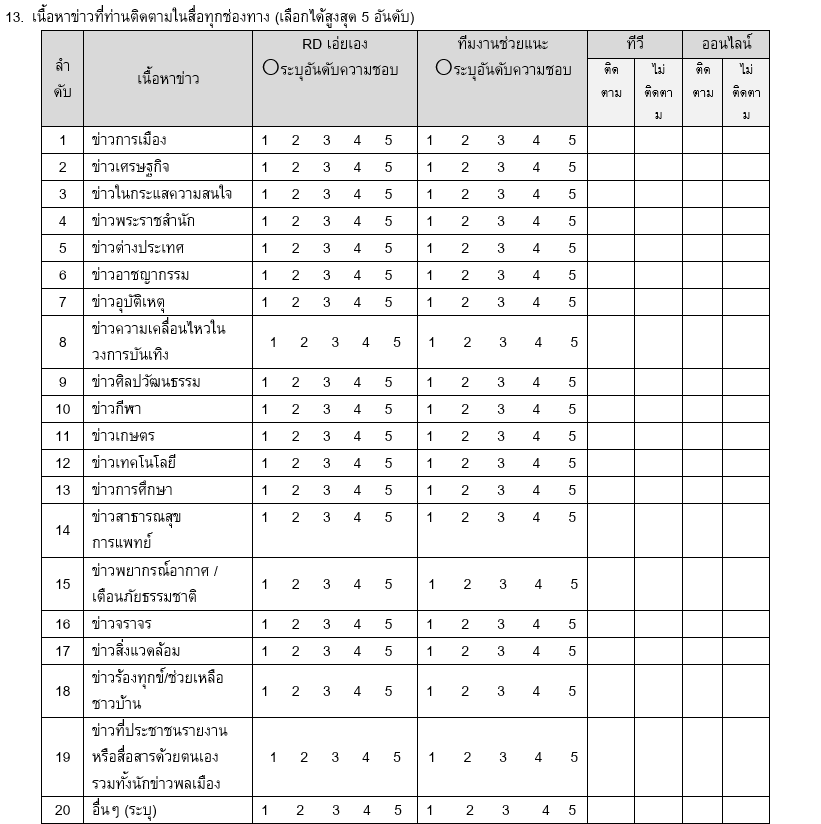

In [94]:
img13 = Image.open(urlopen('https://github.com/LemmonLime/final_ml/raw/main/13new.png'))
img13

* คอลัมน์แสดงคำตอบอันดับเนื้อหาข่าวที่ติดตามทุกช่องทาง

In [95]:
dictf[dictf['รหัส'].str.contains(r'(?:^r|s+)\d(?:\w+)',case=False)]

,รหัส,ข้อคำถาม,code ตัวเลข
108,r1new,r1new RD ระบุอันดับ ข่าวการเมือง,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
109,s1new,s1new ทีมงานช่วยแนะนำ ระบุอันดับ การเมือง,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
112,r2new,r2new RD ระบุอันดับ ข่าวเศรษฐกิจ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
113,s2new,s2new ทีมงานช่วยแนะนำ ระบุอันดับ ข่าวเศรษฐกิจ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
116,r3new,r3new RD ระบุอันดับ ข่าวในกระแสความสนใจ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
117,s3new,s3new ทีมงานช่วยแนะนำ ระบุอันดับ ข่าวในกระแสความสนใจ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
120,r4new,r4new RD ระบุอันดับข่าวพระราชสำนัก,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
121,s4new,s4new ทีมงานช่วยแนะนำ ระบุอันดับข่าวพระราชสำนัก,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
124,r5new,r5new RD ระบุอันดับข่าวต่างประเทศ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5
125,s5new,s5new ทีมงานช่วยแนะนำ ระบุอันดับข่าวต่างประเทศ,1=ติดตามอันดับที่1 2=ติดตามอันดับที่2 3=ติดตามอันดับที่3 4=ติดตามอันดับที่4 5=ติดตามอันดับที่5


In [96]:
df.filter(regex= r'(^r|s+)\d(\w+)')

,r1new,s1new,r2new,s2new,r3new,s3new,r4new,s4new,r5new,s5new,r6new,s6new,r7new,s7new,r8new,s8new,r9new,s9new,r10new,s10new,r11new,s11new,r12new,s12new,r13new,s13new,r14new,s14new,r15new,s15new,r16new,s16new,r17new,s17new,r18new,s18new,r19new,s19new,r20new,s20new
0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,3,0,5,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,2,0,3,0,0,0,0,0,0,0,4,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,3,0,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
4,1,0,3,0,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0,4,0,0,3,0,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2055,1,0,0,0,3,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2056,2,0,0,0,1,0,0,0,0,0,0,4,0,3,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2057,0,5,3,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0


* #### **<span style="color:orange">KNeighborsClassifier: จัดกลุ่มแต่ละช่วงวัยตามเนื้อหาข่าวที่ติดตาม<span>**

แบ่งข้อมูลเป็น train data และ test data

In [97]:
test_size=0.2
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    df.filter(regex= r'(^r|s+)\d(\w+)'), 
    df['Gen_group'], 
    test_size=test_size, random_state=7)

ทำการ Fit model และแสดงค่า model score เพื่อดูค่าความแม่นยำของ model

In [98]:
model3 = KNeighborsClassifier()
model3.fit(X_train3, y_train3)
print(f'train score={model3.score(X_train3, y_train3):.4f}\ntest  score={model3.score(X_test3, y_test3):.4f}')

train score=0.5301
test  score=0.2816


แสดงผลการทำนาย

In [99]:
predicted3 = model3.predict(X_test3)
cm3=metrics.confusion_matrix(y_test3, predicted3)
cm3

array([[38, 26, 19, 13],
       [37, 31, 14, 11],
       [42, 41, 20, 18],
       [39, 25, 11, 27]], dtype=int64)

แสดงผลการทำนายที่คลาดเคลื่อน

In [100]:
dx3=pd.DataFrame({'y_true': y_test3, 'y_pred': predicted3})
dx3[dx3.y_true != dx3.y_pred]

,y_true,y_pred
1331,2,1
1887,2,1
127,4,2
300,3,2
1889,4,1
...,...,...
1739,4,1
861,4,2
1906,2,4
224,2,4


---
### **<span style="color:orange">ช่องทางที่ใช้ในการติดตามเนื้อหาข่าวแต่ละประเภท<span>**
* คอลัมน์แสดงคำตอบช่องทางที่ใช้ในการติดตามเนื้อหาข่าวแต่ละประเภท

In [101]:
dictf[dictf['รหัส'].str.contains(r'(?:^t|u+)\d(?:\w+)',case=False)]

,รหัส,ข้อคำถาม,code ตัวเลข
65,t10,t10 ไม่ติดตามทางทีวี อันดับ 5,1=ติดตาม 2=ไม่ติดตาม
75,u10,u10 ไม่ติดตามทางออนไลน์ อันดับที่ 5,1=ติดตาม 2=ไม่ติดตาม
110,t1new,t1new ติดตามไม่ติดตามทีวี,1=ติดตาม 2=ไม่ติดตาม
111,u1new,u1new ติดตามไม่ติดตามออนไลน์,1=ติดตาม 2=ไม่ติดตาม
114,t2new,t2new ติดตามไม่ติดตามทีวี,1=ติดตาม 2=ไม่ติดตาม
115,u2new,u2new ติดตามไม่ติดตามออนไลน์,1=ติดตาม 2=ไม่ติดตาม
118,t3new,t3new ติดตามไม่ติดตามทีวี,1=ติดตาม 2=ไม่ติดตาม
119,u3new,u3new ติดตามไม่ติดตามออนไลน์,1=ติดตาม 2=ไม่ติดตาม
122,t4new,t4new ติดตามไม่ติดตามทีวี,1=ติดตาม 2=ไม่ติดตาม
123,u4new,u4new ติดตามไม่ติดตามออนไลน์,1=ติดตาม 2=ไม่ติดตาม


In [102]:
df.filter(regex= r'(^t|u+)\d+(new)$')

,t1new,u1new,t2new,u2new,t3new,u3new,t4new,u4new,t5new,u5new,t6new,u6new,t7new,u7new,t8new,u8new,t9new,u9new,t10new,u10new,t11new,u11new,t12new,u12new,t13new,u13new,t14new,u14new,t15new,u15new,t16new,u16new,t17new,u17new,t18new,u18new,t19new,u19new,t20new,u20new
0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* ### **<span style="color:orange">Logistic regression : จัดกลุ่มแต่ละช่วงวัยโดยใช้ช่องทางที่ใช้เพื่อติดตามเนื้อหาข่าวแต่ละประเภท<span>**

แบ่งข้อมูลเป็น train data และ test data

In [103]:
test_size=0.2
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    df.filter(regex= r'(^t|u+)\d+(new)$'), 
    df['Gen_name'], 
    test_size=test_size, random_state=7)

ทำการ Fit model และแสดงค่า model score เพื่อดูค่าความแม่นยำของ model

In [104]:
model4 = LogisticRegression(solver='lbfgs', max_iter=1000)
model4.fit(X_train4, y_train4)
print(f'train score={model4.score(X_train4, y_train4):.4f}\ntest  score={model4.score(X_test4, y_test4):.4f}')

train score=0.3461
test  score=0.2621


แสดงผลการทำนาย

In [105]:
predicted4 = model4.predict(X_test4)
cm4=metrics.confusion_matrix(y_test4, predicted4)
cm4

array([[27, 20, 33, 22],
       [16, 28, 51, 26],
       [21, 18, 35, 19],
       [24, 21, 33, 18]], dtype=int64)

แสดงผลการทำนายที่คลาดเคลื่อน

In [106]:
dx4=pd.DataFrame({'y_true': y_test4, 'y_pred': predicted4})
dx4[dx4.y_true != dx4.y_pred]

,y_true,y_pred
1809,Gen B,Gen Z
1887,Gen Y,Gen B
127,Gen B,Gen Y
300,Gen X,Gen B
1932,Gen Y,Gen Z
...,...,...
643,Gen Y,Gen B
359,Gen Z,Gen X
1906,Gen Y,Gen B
224,Gen Y,Gen B


---
#### **<span style="color:orange">KNeighborsClassifier: จัดกลุ่มแต่ละช่วงวัยตามสื่อออนไลน์ที่ใช้และเนื้อหาข่าวที่ติดตาม<span>**
* คอลัมน์แสดงคำตอบที่เกี่ยวข้อง

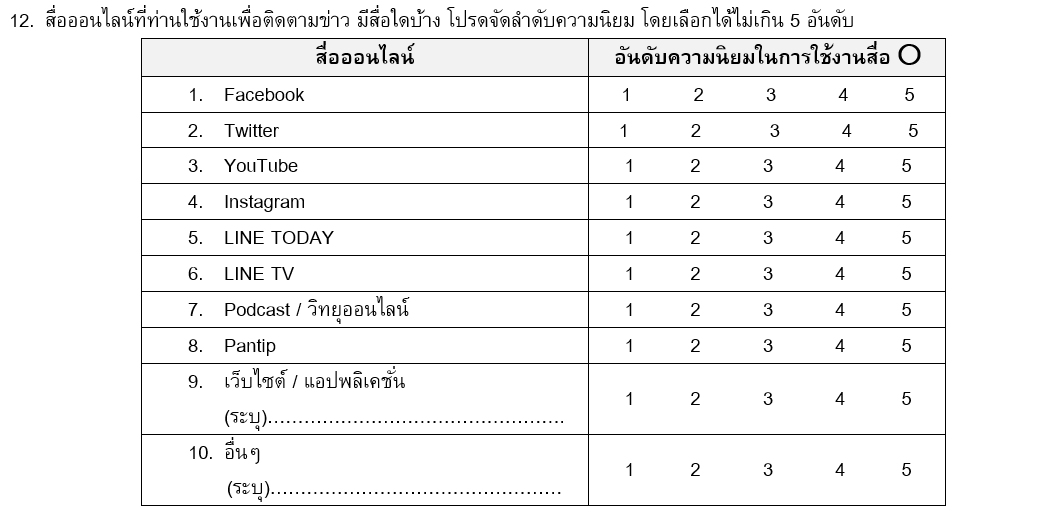

In [107]:
img12


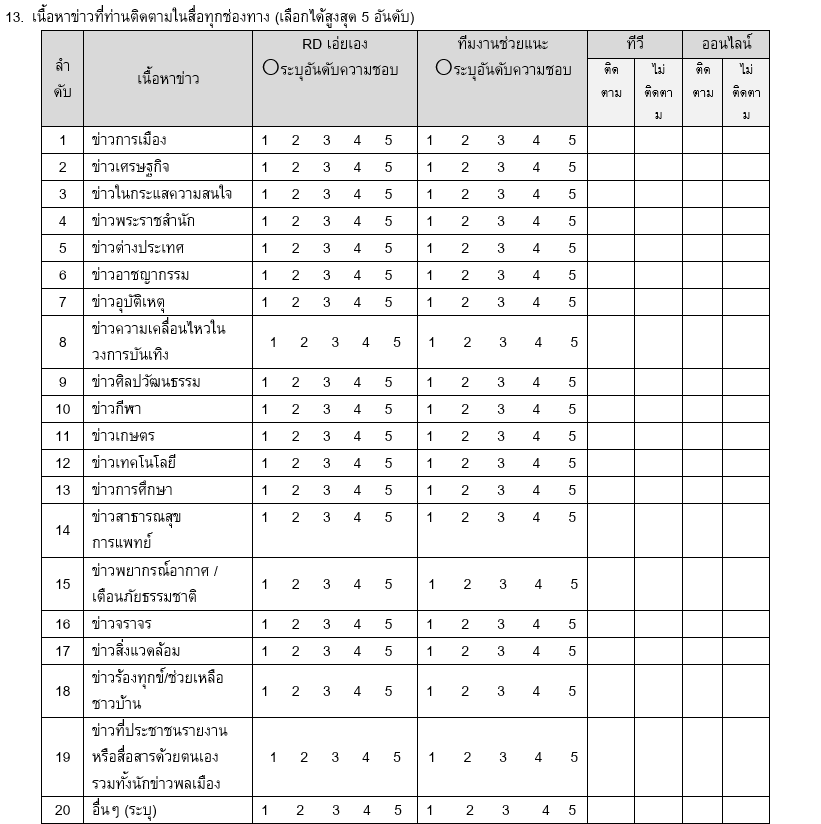

In [108]:
img13

In [109]:
dg = df[['q1new','q2new','q3new','q4new','q5new','q6new','q7new','q8new','q9new','q10new']]
dgg = df.filter(regex= r'(^r|s+)\d+(new)$')
dhl =pd.concat([dg,dgg], axis=1, join='inner')
dhl

,q1new,q2new,q3new,q4new,q5new,q6new,q7new,q8new,q9new,q10new,r1new,s1new,r2new,s2new,r3new,s3new,r4new,s4new,r5new,s5new,r6new,s6new,r7new,s7new,r8new,s8new,r9new,s9new,r10new,s10new,r11new,s11new,r12new,s12new,r13new,s13new,r14new,s14new,r15new,s15new,r16new,s16new,r17new,s17new,r18new,s18new,r19new,s19new,r20new,s20new
0,1,0,3,2,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,1,0,2,3,0,0,0,0,0,0,4,0,0,0,3,0,5,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,2,0,0,3,0,0,0,0,0,0,1,0,2,0,3,0,0,0,0,0,0,0,4,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,2,0,3,0,0,0,0,0,1,0,3,0,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,0,0,0,0,0,0,1,0,3,0,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,1,0,2,0,0,3,0,0,0,0,0,4,0,0,3,0,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2055,1,3,2,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2056,1,0,2,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,4,0,3,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2057,1,2,3,0,0,0,0,0,0,0,0,5,3,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0


แบ่งข้อมูลเป็น train data และ test data

In [110]:
test_size=0.2
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    dhl, 
    df['Gen_group'], 
    test_size=test_size, random_state=7)

ทำการ Fit model และแสดงค่า model score เพื่อดูค่าความแม่นยำของ model

In [111]:
model5 = KNeighborsClassifier()
model5.fit(X_train5, y_train5)
print(f'train score={model5.score(X_train5, y_train5):.4f}\ntest  score={model5.score(X_test5, y_test5):.4f}')

train score=0.5404
test  score=0.3131


แสดงผลการทำนาย

In [112]:
predicted5 = model5.predict(X_test5)
cm5=metrics.confusion_matrix(y_test5, predicted5)
cm5

array([[39, 31, 15, 11],
       [33, 41, 14,  5],
       [45, 41, 21, 14],
       [38, 24, 12, 28]], dtype=int64)

แสดงผลการทำนายที่คลาดเคลื่อน

In [113]:
dx5=pd.DataFrame({'y_true': y_test5, 'y_pred': predicted5})
dx5[dx5.y_true != dx5.y_pred]

,y_true,y_pred
1331,2,3
1809,4,1
1887,2,1
127,4,1
300,3,2
...,...,...
1739,4,2
861,4,2
1906,2,1
224,2,3
